In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
import keras

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from keras.layers import Dense

In [6]:
#importing dataset
df = pd.read_csv("D://datas//data 2//stocks//NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [7]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


<Axes: xlabel='Date'>

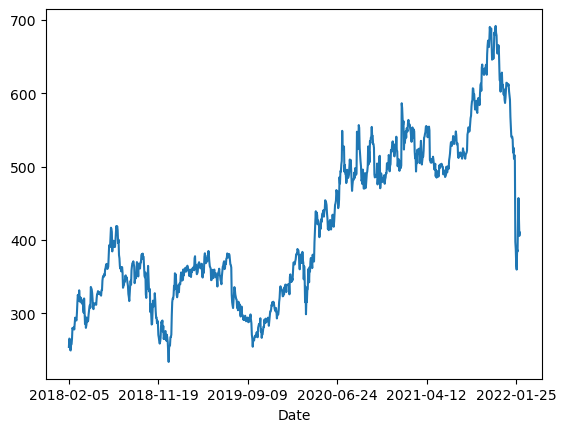

In [9]:
cls = df[('Close')]
cls.plot()

In [10]:
df1=cls.values
df1

array([254.259995, 265.720001, 264.559998, ..., 429.480011, 405.600006,
       410.170013])

In [11]:
df1.shape

(1009,)

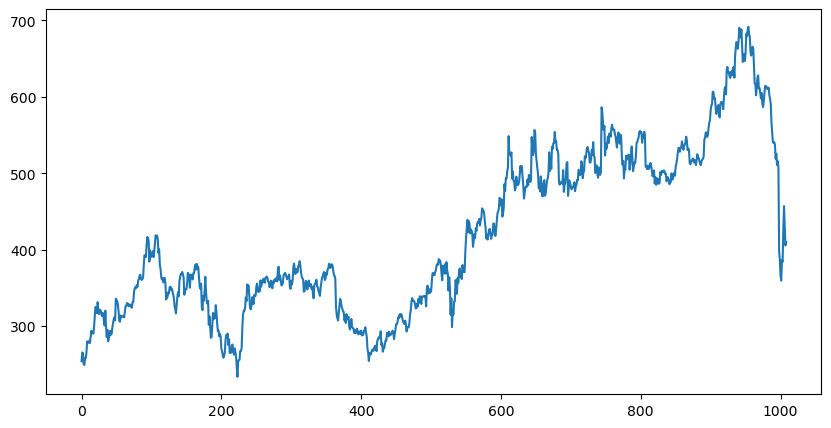

In [12]:
#plotting the data
plt.figure(figsize=(10,5))
plt.plot(df1)

In [13]:
#scalling the data
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [15]:
len(df1)

1009

In [16]:
#Defining train and test sizes of data
train_size = int(len(df1)*0.8)
test_size = len(df1) - train_size 

In [17]:
train_size ,test_size 

(807, 202)

In [18]:
#Splitting data between train and test
train = df1[0:train_size,:]  


In [19]:
test = df1[train_size:len(df1),:1]

In [20]:
len(train),len(test)

(807, 202)

In [21]:
#creating dataset matrix for LSTM model
def create_df(dataset,step):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        ds = dataset[i:(i+step),0]
        X.append(ds)
        y.append(dataset[i+step,0])
    return np.array(X), np.array(y)

In [22]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train,y_train = create_df(train,time_stamp)
X_test,y_test = create_df(test,time_stamp)

In [23]:
X_train.shape,y_train.shape

((706, 100), (706,))

In [24]:
X_test.shape,y_test.shape

((101, 100), (101,))

In [25]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
#Importing the liabraries for LSTM
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [27]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
6/6 [==============================] - 14s 1s/step - loss: 0.0619 - val_loss: 0.0476
Epoch 2/100
6/6 [==============================] - 4s 645ms/step - loss: 0.0159 - val_loss: 0.0799
Epoch 3/100
6/6 [==============================] - 4s 634ms/step - loss: 0.0131 - val_loss: 0.0330
Epoch 4/100
6/6 [==============================] - 4s 673ms/step - loss: 0.0074 - val_loss: 0.0174
Epoch 5/100
6/6 [==============================] - 4s 633ms/step - loss: 0.0056 - val_loss: 0.0291
Epoch 6/100
6/6 [==============================] - 4s 625ms/step - loss: 0.0046 - val_loss: 0.0173
Epoch 7/100
6/6 [==============================] - 4s 659ms/step - loss: 0.0037 - val_loss: 0.0161
Epoch 8/100
6/6 [==============================] - 4s 699ms/step - loss: 0.0033 - val_loss: 0.0162
Epoch 9/100
6/6 [==============================] - 4s 665ms/step - loss: 0.0031 - val_loss: 0.0217
Epoch 10/100
6/6 [==============================] - 4s 679ms/step - loss: 0.0031 - val_loss: 0.0163
Epoch 11/10

6/6 [==============================] - 4s 690ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 84/100
6/6 [==============================] - 4s 656ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 85/100
6/6 [==============================] - 4s 640ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 86/100
6/6 [==============================] - 4s 650ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 87/100
6/6 [==============================] - 4s 636ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 88/100
6/6 [==============================] - 4s 674ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 89/100
6/6 [==============================] - 4s 688ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 90/100
6/6 [==============================] - 4s 655ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 91/100
6/6 [==============================] - 4s 615ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 92/100
6/6 [==============================] - 4s 680ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 93/100


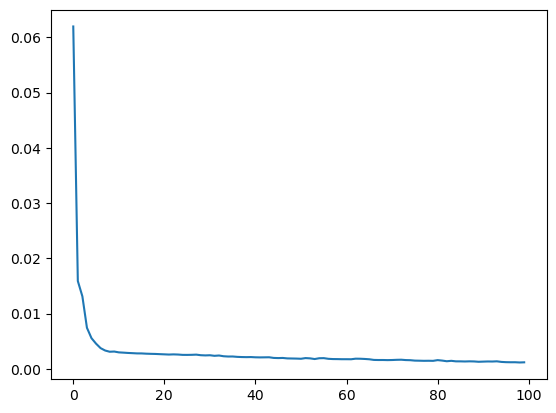

In [29]:
#plotting loss, which shows that loss has decreased significantly and model has trained well.
loss = model.history.history['loss']
plt.plot(loss)

In [30]:
#Predicting on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 42ms/step


In [31]:
#Inverse transformation to get actual value.
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

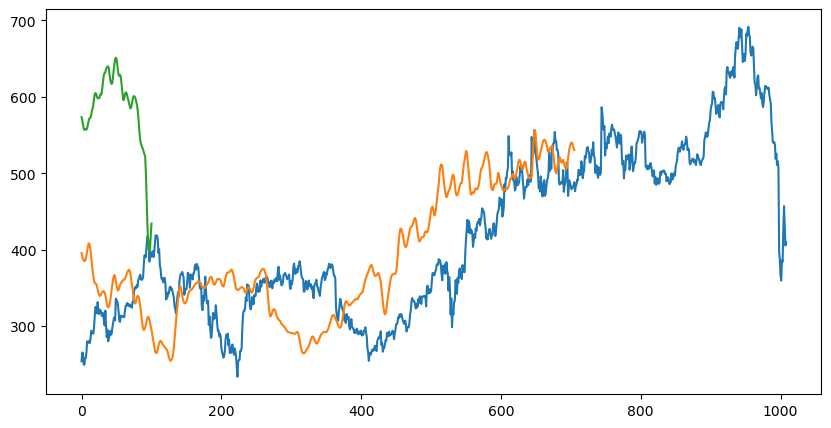

In [32]:
#Compairing using data visiualization
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)

In [33]:
test = np.vstack((train_predict, test_predict))

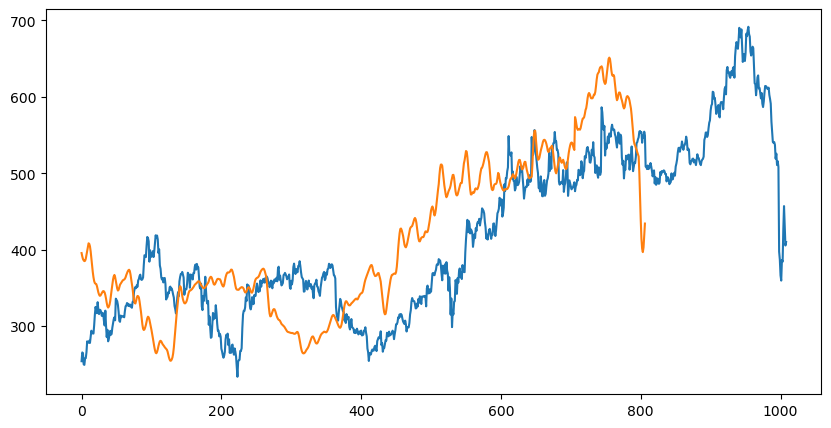

In [34]:
#Combining the predicted data to create uniform data visiualization
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(test)

In [35]:
len(test)

807

In [65]:
#Getting the last 100 days records
fut_inp = test[707: ]
fut_inp = fut_inp.reshape(1,-1)
fut_inp.shape

(1, 100)

In [66]:
tmp_inp = list(fut_inp)

In [67]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [68]:
#Predicting next 30 days price suing the current data.
#It will predict in sliding window manner (algorithm) with stride 1
lst_output = []
n_steps = 100
i = 0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp,verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp =  tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        fut_inp =  fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i+1
            
           
            
print(lst_output)                         

[[1.9085088968276978], [1.9455397129058838], [1.9526523351669312], [1.9431917667388916], [1.9279356002807617], [1.8970595598220825], [1.8096104860305786], [1.6954325437545776], [1.595456600189209], [1.5203349590301514], [1.463524580001831], [1.4156489372253418], [1.3721976280212402], [1.332740306854248], [1.2972874641418457], [1.2654576301574707], [1.2382315397262573], [1.218602180480957], [1.2097219228744507], [1.2128212451934814], [1.2266234159469604], [1.2479525804519653], [1.2727165222167969], [1.2967989444732666], [1.3167223930358887], [1.3300504684448242], [1.3355268239974976], [1.3329753875732422], [1.3230488300323486], [1.3069202899932861]]


In [69]:
len(df1)

1009

In [70]:
#Creating a dummay plane to plot graph one after another
plot_new = np.arange(1,101)
plot_pred = np.arange(101,131)

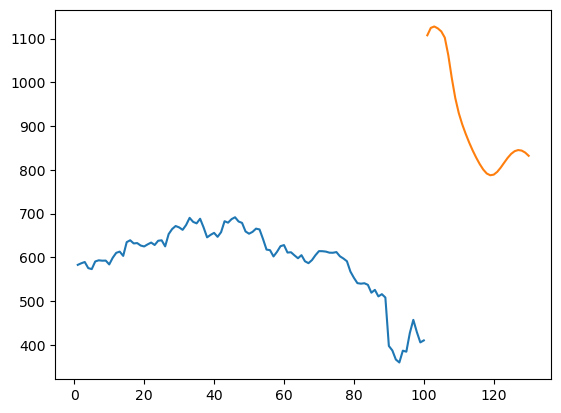

In [71]:
#plt.figure(figsize=(10,5))
plt.plot(plot_new,scaler.inverse_transform(df1[909:]))
plt.plot(plot_pred,scaler.inverse_transform(lst_output))

In [72]:
ds_new = df1.tolist()

In [73]:
len(ds_new)

1009

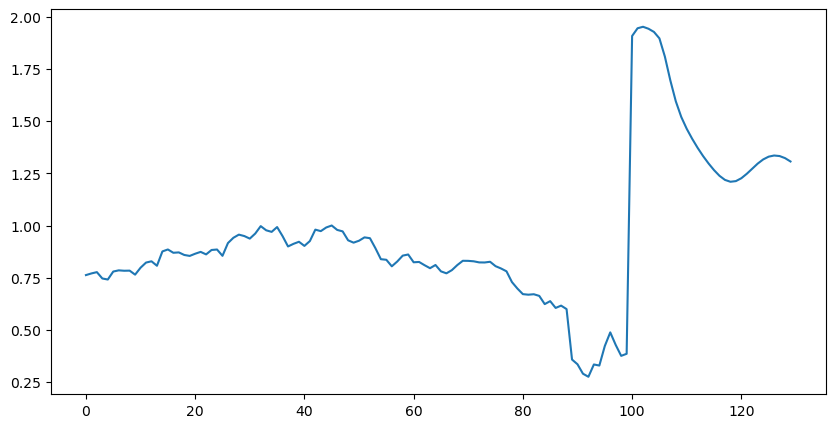

In [74]:
#filling the missing value with approx value
plt.figure(figsize=(10,5))
ds_new.extend(lst_output)
plt.plot(ds_new[909:])

In [75]:
#Ceating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

TypeError: float expected at most 1 argument, got 1039

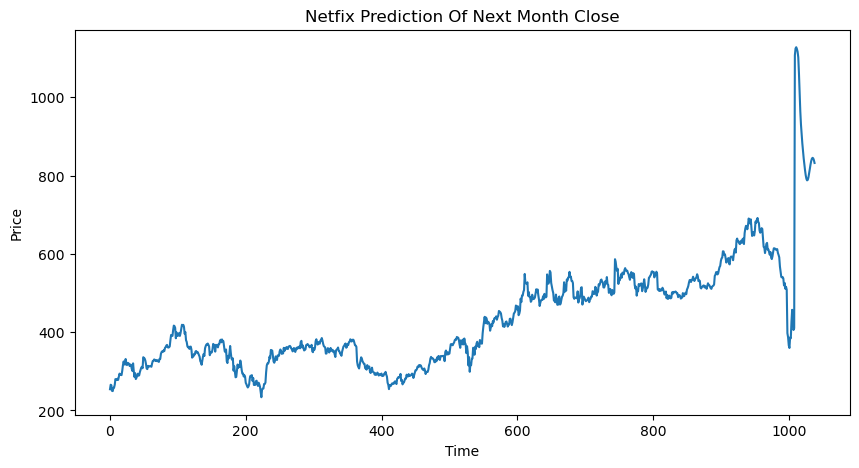

In [83]:
#Plotting final results with predicted value after 30 Days
plt.figure(figsize=(10,5))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("Netfix Prediction Of Next Month Close")
plt.axhline(y=final_graph[len(final_graph)-1],color = 'red',linestyle=':',label = 'NEXT 30D: {0}'.format(round(float(*final_graph))))
plt.legend()